### STATS507 - PS4
#### Xuechun Wang
#### 24107190

In [2]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind_from_stats
import scipy.stats as stats
from scipy.stats import norm, binom, beta
import math
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import os
import pickle
from STATS507_PS1 import ci_prop
#Credited to Professor Henderson's PS1 solution

1, 11, 55, 165, 330, 462, 462, 330, 165, 55, 11, 1
                          1   
                        1   1   
                      1   2   1   
                    1   3   3   1   
                  1   4   6   4   1   
                1   5   10  10  5   1   
              1   6   15  20  15  6   1   
            1   7   21  35  35  21  7   1   
          1   8   28  56  70  56  28  8   1   
        1   9   36  84  126 126 84  36  9   1   
      1   10  45  120 210 252 210 120 45  10  1   
    1   11  55  165 330 462 462 330 165 55  11  1   
    Confi Level    Confi Inter        Width
--  -------------  ---------------  -------
 4  90.0%          (0.382 , 0.553)    0.171
 9  95.0%          (0.367 , 0.569)    0.202
14  99.0%          (0.338 , 0.600)    0.262
 2  90.0%          (0.376 , 0.559)    0.183
 7  95.0%          (0.361 , 0.575)    0.214
12  99.0%          (0.331 , 0.606)    0.275
 3  90.0%          (0.382 , 0.553)    0.171
 8  95.0%          (0.366 , 0.569)    0.203
13  9

/Users/Sylvia/Desktop/py/STATS507_PS1.py:359: Warning: Normal approximation may be incorrect for n * min(p, 1-p) < 12.
  warn(Warning(


## Pivot Table

 - Pivot table is a table of grouped value that aggregates individual items of a more extensive table.
 - The aggregations can be count, sum, mean, stats tool etc.
 - Levels can be stored as multiIndex objects and columns of the result DataFrame.
 - It arrange or rearrange data to provide a more direct insight into datasets
 - **pd.pivot_table(data, values = None, index = None, aggfunc = 'mean'...)** can take more parameters
 - Requires data and index parameter, data is the dataFrame passed into the function, index allow us to group the data 

In [2]:
#import used dataset as example
recs2015 = pd.read_csv("https://www.eia.gov/consumption/residential/data/2015/csv/recs2015_public_v4.csv")

#Pivot table can take single or multiple indexes via a list to see how data is grouped by
pd.pivot_table(recs2015, index = ['REGIONC','DOEID'])

ADQINSUL  AGECDRYER  AGECENAC  AGECWASH  AGEDW  AGEFRZR  \
REGIONC DOEID                                                            
1       10005         2          3         3         3     -2       -2   
        10006         1         -2        -2        -2     -2       -2   
        10009         2          2         3         2      3        3   
        10011         2          3        -2         3     -2       -2   
        10018         2         41        -2        41     41       -2   
...                 ...        ...       ...       ...    ...      ...   
4       15658         3          1        -2         2     -2       -2   
        15660         1         -2        41        -2      2       -2   
        15661         2          1        41         1     -2       42   
        15675         1          3         2         3      1       -2   
        15680         1          2         1         2      3       -2   

               AGERFRI1  AGERFRI2  AIRCOND  ALTFUELPEV  ...  ZWASHTEMP  \
REGIONC DOEID                                           ...              
1       10005         1         2        1           0  ...          0   
        10006         1        -2        1           0  ...         -2   
        10009         3         3        1           0  ...          0   
        10011         2         3        1           0  ...          0   
        10018        41        41        0           0  ...          0   
...                 ...       ...      ...         ...  ...        ...   
4       15658         2         1        0           0  ...          0   
        15660         3        -2        1           0  ...         -2   
        15661         3        -2        1           0  ...          0   
        15675         1        -2        1           0  ...          0   
        15680         3         2        1           0  ...          0   

               ZWDPELLET  ZWHEATAGE  ZWHEATSIZ  ZWINDOWS  ZWINFRAME  ZWOODAMT  \
REGIONC DOEID                                                                   
1       10005         -2          0          0         0          0        -2   
        10006         -2          0         -2         0          0        -2   
        10009         -2          0          0         0          0        -2   
        10011         -2          0          0         0          0        -2   
        10018         -2          0          1         0          0        -2   
...                  ...        ...        ...       ...        ...       ...   
4       15658          0          0          0         0          0         0   
        15660         -2          0          0         0          0        -2   
        15661         -2          0          0         0          0        -2   
        15675         -2          0          0         0          0        -2   
        15680         -2          0          0         0          0        -2   

               ZWOODLOGS  ZWWACAGE  ZYEARMADERANGE  
REGIONC DOEID                                       
1       10005         -2        -2               0  
        10006         -2         0               0  
        10009         -2        -2               0  
        10011         -2         0               0  
        10018         -2        -2               0  
...                  ...       ...             ...  
4       15658          0        -2               0  
        15660         -2        -2               0  
        15661         -2        -2               0  
        15675         -2        -2               0  
        15680         -2        -2               0  

[5686 rows x 753 columns]

In [3]:
#Apply different aggregation function for different feature
#We can calculate mean of NWEIGHT and sum of CDD65 after groupbying regions
pd.pivot_table(recs2015, index = 'REGIONC',aggfunc={'NWEIGHT':np.mean,'CDD65':np.sum, 'HDD65':np.sum})

,CDD65,HDD65,NWEIGHT
REGIONC,,,
1,748275,4589542,26456.596977
2,1252839,7760126,19873.198945
3,5306622,4419083,22110.434826
4,2467670,4314077,16969.776849


In [4]:
#Aggregate on specific features with values parameter
#Meanwhile, can use mulitple aggfunc via a list
pd.pivot_table(recs2015, index = 'REGIONC', values = 'NWEIGHT', aggfunc = [np.mean, len])

,mean,len
,NWEIGHT,NWEIGHT
REGIONC,,
1,26456.596977,794.0
2,19873.198945,1327.0
3,22110.434826,2010.0
4,16969.776849,1555.0


In [5]:
#Find relationship between feature with columns parameter
#UATYP10 - A categorical data type representing census 2010 urban type
#        - U: Urban Area; R: Rural; C: Urban Cluster
pd.pivot_table(recs2015,index='REGIONC',columns='UATYP10',values='NWEIGHT',aggfunc=np.sum)

UATYP10,C,R,U
REGIONC,,,
1,2.153686e+06,3.257375e+06,1.559548e+07
2,3.549498e+06,5.624221e+06,1.719802e+07
3,5.350796e+06,1.102680e+07,2.806438e+07
4,1.460669e+06,3.550944e+06,2.137639e+07


## Q1 - NHANES Table 1

##### Previous work from PS2

In [1]:
#Import Datasets of demography
demo11_12 = pd.read_sas('/Users/Sylvia/Desktop/DEMO_G.XPT', encoding = 'utf-8')
demo13_14 = pd.read_sas('/Users/Sylvia/Desktop/DEMO_H.XPT', encoding = 'utf-8')
demo15_16 = pd.read_sas('/Users/Sylvia/Desktop/DEMO_I.XPT', encoding = 'utf-8')
demo17_18 = pd.read_sas('/Users/Sylvia/Desktop/DEMO_J.XPT', encoding = 'utf-8')

NameError: name 'pd' is not defined

In [4]:
#Extract columns
updateddemo11_12 = demo11_12[['SEQN','RIDAGEYR','RIAGENDR','RIDRETH3','DMDEDUC2','DMDMARTL','RIDSTATR','SDMVPSU','SDMVSTRA',
                             'WTMEC2YR','WTINT2YR']]
updateddemo13_14 = demo13_14[['SEQN','RIDAGEYR','RIAGENDR','RIDRETH3','DMDEDUC2','DMDMARTL','RIDSTATR','SDMVPSU','SDMVSTRA',
                             'WTMEC2YR','WTINT2YR']]
updateddemo15_16 = demo15_16[['SEQN','RIDAGEYR','RIAGENDR','RIDRETH3','DMDEDUC2','DMDMARTL','RIDSTATR','SDMVPSU','SDMVSTRA',
                             'WTMEC2YR','WTINT2YR']]
updateddemo17_18 = demo17_18[['SEQN','RIDAGEYR','RIAGENDR','RIDRETH3','DMDEDUC2','DMDMARTL','RIDSTATR','SDMVPSU','SDMVSTRA',
                             'WTMEC2YR','WTINT2YR']]

In [5]:
#Create Cohorts
updateddemo11_12['cohort'] = '2011-2012'
updateddemo13_14['cohort'] = '2013-2014'
updateddemo15_16['cohort'] = '2015-2016'
updateddemo17_18['cohort'] = '2017-2018'

<ipython-input-5-ff9bc883d50e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  updateddemo11_12['cohort'] = '2011-2012'
<ipython-input-5-ff9bc883d50e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  updateddemo13_14['cohort'] = '2013-2014'
<ipython-input-5-ff9bc883d50e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user

In [6]:
#Clean data
demo = pd.concat([updateddemo11_12, updateddemo13_14, updateddemo15_16, updateddemo17_18], axis = 0)
demo = demo.rename(columns ={'SEQN':'id','RIDAGEYR':'age','RIAGENDR':'gender','RIDRETH3':'race',
                             'DMDEDUC2':'education',
                            'DMDMARTL':'martial_status','RIDSTATR':'exam_status','SDMVPSU':'maskedvar-psu',
                            'SDMVSTRA':'maskedvar-stra','WTMEC2YR':'fullsample2yr_mec',
                            'WTINT2YR':'fullsample2yr_int'})
demo[['id','age','race']] = demo[['id','age','race']].astype(int)
demo[['education', 'martial_status', 'exam_status']] = demo[['education', 'martial_status', 'exam_status']].astype('category')
demo[['fullsample2yr_mec','fullsample2yr_int']] = demo[['fullsample2yr_mec','fullsample2yr_int']].round(2)
demo['fullsample2yr_mec'] = pd.to_numeric(demo['fullsample2yr_mec'], errors='coerce')
demo['maskedvar-psu'] = pd.to_numeric(demo['maskedvar-psu'], errors='coerce')
demo['maskedvar-stra'] = pd.to_numeric(demo['maskedvar-stra'], errors='coerce')
demo['cohort'] = demo['cohort'].astype('category')

In [10]:
#Import datasets of oral health
oral11_12 = pd.read_sas('/Users/Sylvia/Desktop/OHXDEN_G.XPT', encoding = 'utf-8')
oral13_14 = pd.read_sas('/Users/Sylvia/Desktop/OHXDEN_H.XPT', encoding = 'utf-8')
oral15_16 = pd.read_sas('/Users/Sylvia/Desktop/OHXDEN_I.XPT', encoding = 'utf-8')
oral17_18 = pd.read_sas('/Users/Sylvia/Desktop/OHXDEN_J.XPT', encoding = 'utf-8')

In [11]:
#Extract columns
updatedoral11_12 = oral11_12[['SEQN','OHDDESTS']]
updatedoral13_14 = oral13_14[['SEQN','OHDDESTS']]
updatedoral15_16 = oral15_16[['SEQN','OHDDESTS']]
updatedoral17_18 = oral17_18[['SEQN','OHDDESTS']]

In [12]:
#Setup cohorts
updatedoral11_12['cohort'] = '2011-2012'
updatedoral13_14['cohort'] = '2013-2014'
updatedoral15_16['cohort'] = '2015-2016'
updatedoral17_18['cohort'] = '2017-2018'

<ipython-input-12-894c09b15958>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  updatedoral11_12['cohort'] = '2011-2012'
<ipython-input-12-894c09b15958>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  updatedoral13_14['cohort'] = '2013-2014'
<ipython-input-12-894c09b15958>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/u

In [13]:
#Concat datasets
oral = pd.concat([updatedoral11_12, updatedoral13_14, updatedoral15_16, updatedoral17_18], axis = 0)
oral = oral.rename(columns = {'SEQN':'id', 'OHDDESTS':'ohx_status'})
oral[['id','ohx_status']] = oral[['id','ohx_status']].astype(int)
oral.iloc[:,2:] = oral.iloc[:,2:].astype('category')

In [7]:
pickle_out_demo = open("demo_file.pkl","wb")
pickle.dump(demo, pickle_out_demo)
pickle_out_demo.close()

In [8]:
pickle_in_demo = open("demo_file.pkl","rb")
example_demo = pickle.load(pickle_in_demo)
print(example_demo)

          id  age  gender  race education martial_status exam_status  \
0      62161   22     1.0     3       3.0            5.0         2.0   
1      62162    3     2.0     1       NaN            NaN         2.0   
2      62163   14     1.0     6       NaN            NaN         2.0   
3      62164   44     2.0     3       4.0            1.0         2.0   
4      62165   14     2.0     4       NaN            NaN         2.0   
...      ...  ...     ...   ...       ...            ...         ...   
9249  102952   70     2.0     6       3.0            1.0         2.0   
9250  102953   42     1.0     1       3.0            4.0         2.0   
9251  102954   41     2.0     4       5.0            5.0         2.0   
9252  102955   14     2.0     4       NaN            NaN         2.0   
9253  102956   38     1.0     3       4.0            3.0         2.0   

      maskedvar-psu  maskedvar-stra  fullsample2yr_mec  fullsample2yr_int  \
0               1.0            91.0          104236.58    

In [14]:
demo.to_pickle("demo_file.pkl")

In [15]:
#import pickle file
demo = pd.read_pickle("demo_file.pkl")

##### Q1 - Part b

In [16]:
#Merge demography and oralhealth by id
oral_selected = oral[['id','ohx_status']]
demo_merged = pd.merge(demo, oral_selected, on = 'id', how = 'left')

#Separated age into two levels: under 20 and above 20
demo_merged['under_20'] = np.where(demo_merged['age']<20, "True","False")

#Separate education into two levels: 'some college/college graduate', 'No college/<20'
conditions = [
    (demo_merged['education'] == 4.0) | (demo_merged['education'] == 5.0),
    (demo_merged['education'] == 1.0) | (demo_merged['education'] == 2.0) | (demo_merged['education'] == 3.0)]
choices = ['some college/college graduate', 'No college/<20']
demo_merged['college'] = np.select(conditions, choices, 'No college/<20')
demo_updated = demo_merged[['id','gender','age','under_20','college','exam_status','ohx_status']]

#Separate ohx into two levels: completing and missing
demo_updated['ohx'] = np.where((demo_updated['exam_status'] == 2.0)&(demo_updated['ohx_status'] ==1),'complete','missing')

#Replace categorical expression of gender
demo_updated['gender'] = np.where(demo_updated['gender'] == 1.0, 'Male', 'Female')
demo_updated

<ipython-input-16-75d7b2b1b1ca>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demo_updated['ohx'] = np.where((demo_updated['exam_status'] == 2.0)&(demo_updated['ohx_status'] ==1),'complete','missing')
<ipython-input-16-75d7b2b1b1ca>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demo_updated['gender'] = np.where(demo_updated['gender'] == 1.0, 'Male', 'Female')


,id,gender,age,under_20,college,exam_status,ohx_status,ohx
0,62161,Male,22,False,No college/<20,2.0,1.0,complete
1,62162,Female,3,True,No college/<20,2.0,1.0,complete
2,62163,Male,14,True,No college/<20,2.0,1.0,complete
3,62164,Female,44,False,some college/college graduate,2.0,1.0,complete
4,62165,Female,14,True,No college/<20,2.0,1.0,complete
...,...,...,...,...,...,...,...,...
39151,102952,Female,70,False,No college/<20,2.0,1.0,complete
39152,102953,Male,42,False,No college/<20,2.0,1.0,complete
39153,102954,Female,41,False,some college/college graduate,2.0,1.0,complete
39154,102955,Female,14,True,No college/<20,2.0,1.0,complete


##### Q1 - Part c

In [17]:
#Keep only the exam_status == 2
demo_updated_ = demo_updated[demo_updated['exam_status'] == 2.0] 

#Compute the difference with previous data length and current data length
remains = demo_updated_['exam_status'].shape[0]
origins = demo_updated['exam_status'].shape[0]
diff = origins - remains

#Express through dictionary and dataFrame
data = {'rows_initial':origins, 'rows_remains':remains,'rows_removed':diff}
df = pd.DataFrame(data, index = ['num'])
df

,rows_initial,rows_remains,rows_removed
num,39156,37399,1757


##### Q1 - Part d

In [18]:
#Compute the count and percentage within categorical variable
summary = demo_updated_[['age','under_20','gender','college','ohx']]
summary['under_20'] = np.where(summary['under_20'] == 'False','above_20','under_20')
under_20_sum1 = pd.crosstab(summary['under_20'], summary['ohx'])
under_20_sum2 = pd.crosstab(summary['under_20'], summary['ohx'], normalize = 'index')
under_20 = (pd.concat([under_20_sum1, under_20_sum2], axis=1, keys=['count', 'pct%'])
      .swaplevel(axis=1)
      .sort_index(axis=1, ascending=[True, False])
)
gender_sum1 = pd.crosstab(summary['gender'], summary['ohx'])
gender_sum2 = pd.crosstab(summary['gender'], summary['ohx'], normalize = 'index')
gender = (pd.concat([gender_sum1, gender_sum2], axis=1, keys=['count', 'pct%'])
      .swaplevel(axis=1)
      .sort_index(axis=1, ascending=[True, False])
)
college_sum1 = pd.crosstab(summary['college'], summary['ohx'])
college_sum2 = pd.crosstab(summary['college'], summary['ohx'], normalize = 'index')
college = (pd.concat([college_sum1, college_sum2], axis=1, keys=['count', 'pct%'])
      .swaplevel(axis=1)
      .sort_index(axis=1, ascending=[True, False])
)
summ = pd.concat([under_20,gender,college])
summ

<ipython-input-18-afa6cf862778>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  summary['under_20'] = np.where(summary['under_20'] == 'False','above_20','under_20')


ohx                            complete          missing      
                                   pct%  count      pct% count
above_20                       0.941005  20369  0.058995  1277
under_20                       0.888148  13991  0.111852  1762
Female                         0.914277  17342  0.085723  1626
Male                           0.923336  17018  0.076664  1413
No college/<20                 0.904453  22974  0.095547  2427
some college/college graduate  0.948991  11386  0.051009   612

In [19]:
#Compute the mean and standard deviation within the continuous variable
age = summary.groupby('ohx').agg({'age': ['mean', 'std']}).transpose().reset_index()
age

ohx,level_0,level_1,complete,missing
0,age,mean,33.169470,22.009543
1,age,std,24.367362,26.587235


In [20]:
#Apply t-test towards age variable
ttest_ind_from_stats(mean1=age['complete'][0], std1=age['complete'][1], nobs1=13,
                     mean2=age['missing'][0], std2=age['missing'][1], nobs2=11)

Ttest_indResult(statistic=1.0724628262045621, pvalue=0.2951361494929664)

In [21]:
#Apply chi-square towards under_20 categorical variables
under_20_data = np.array([under_20.iloc[0][0:5].values,
                  under_20.iloc[1][0:5].values])
chi_20 = stats.chi2_contingency(under_20_data)[0:3]

In [22]:
#Apply chi-square towards college categorical variables
college_data = np.array([college.iloc[0][0:5].values,
                  college.iloc[1][0:5].values])
chi_col = stats.chi2_contingency(college_data)[0:3]

In [23]:
#Apply chi-square towards gender categorical variables
gender_data = np.array([gender.iloc[0][0:5].values,
                  gender.iloc[1][0:5].values])
chi_gen = stats.chi2_contingency(gender_data)[0:3]

In [24]:
#Create Table
chi_data = {'under_20':chi_20, 'college':chi_col, 'gender':chi_gen}
chi_square = pd.DataFrame(chi_data, index = ['statistical_value', 'p-value', 'df'])
chi_square.iloc[:1] = chi_square.iloc[:1].applymap('{0:.2f}'.format)
chi_square

,under_20,college,gender
statistical_value,341.28,216.84,10.28
p-value,1.15378e-73,9.69461e-47,0.0163557
df,3,3,3


## Q2 - Monte Carlo Comparison

##### part a - Level Calibration

##### Clopper-Pearson method

In [25]:
#Generate confidece interval for 100 times
n_mc = 100
level = 0.95
ZVal = 1.96
#Set a sequence of values
sample_size = [100, 200, 300, 400, 500]
p = [0.1, 0.2, 0.3, 0.4, 0.5]
result_CP = []
lwr_CP_list = []
upr_CP_list = []
#Nested For Loop for the cells 
for i in range(len(sample_size)):
    for j in range(len(p)):
        true_val = 0
        for m in range(n_mc):
            #Monte Carlo Simulation
            generated_data = np.random.binomial(1, p[j], sample_size[i])
            lwr_CP = float(ci_prop(generated_data, level, method = "CP")[12:16])
            upr_CP = float(ci_prop(generated_data, level, method = "CP")[18:22])
            lwr_CP_list.append(lwr_CP)
            upr_CP_list.append(upr_CP)
            if lwr_CP < p[j] < upr_CP:
                true_val += 1
            else:
                true_val = true_val
        result_CP.append(true_val)

Text(0.5, 1.0, 'Clopper-Pearson method')

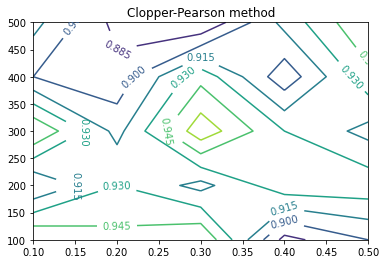

In [26]:
#Contour Plot
quotients_CP = [number / n_mc for number in result_CP]
quotients_CP_ = np.array(quotients_CP)
B = np.reshape(quotients_CP_, (-1, 5))
X, Y = np.meshgrid(p, sample_size)
Z = B
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
ax.clabel(CS, inline=True, fontsize=10)
ax.set_title('Clopper-Pearson method')

##### Jeffery's method

In [27]:
#Generate confidece interval for 100 times
n_mc = 100
level = 0.95
ZVal = 1.96
#Set a sequence of values
sample_size = [100, 200, 300, 400, 500]
p = [0.1, 0.2, 0.3, 0.4, 0.5]
result_Jeffrey = []
lwr_J_list = []
upr_J_list = []
#Nested For loop for the cells 
for i in range(len(sample_size)):
    for j in range(len(p)):
        true_val = 0
        for m in range(n_mc):
            #Monte Carlo Simulation
            generated_data = np.random.binomial(1, p[j], sample_size[i])
            lwr_J = float(ci_prop(generated_data, level, method = "Jeffrey")[12:16])
            upr_J = float(ci_prop(generated_data, level, method = "Jeffrey")[18:22])
            lwr_J_list.append(lwr_J)
            upr_J_list.append(upr_J)
            if lwr_J < p[j] < upr_J:
                true_val += 1
            else:
                true_val = true_val
        result_Jeffrey.append(true_val)

Text(0.5, 1.0, 'Jeffrey method')

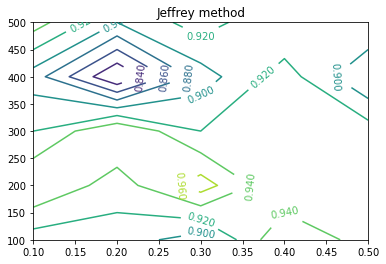

In [28]:
#Contour Plot
quotients_Jeffrey = [number / n_mc for number in result_Jeffrey]
quotients_Jeffrey_ = np.array(quotients_Jeffrey)
B = np.reshape(quotients_Jeffrey_, (-1, 5))
X, Y = np.meshgrid(p, sample_size)
Z = B
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
ax.clabel(CS, inline=True, fontsize=10)
ax.set_title('Jeffrey method')

##### Normal

/Users/Sylvia/Desktop/py/STATS507_PS1.py:359: Warning: Normal approximation may be incorrect for n * min(p, 1-p) < 12.
  warn(Warning(


Text(0.5, 1.0, 'Normal method')

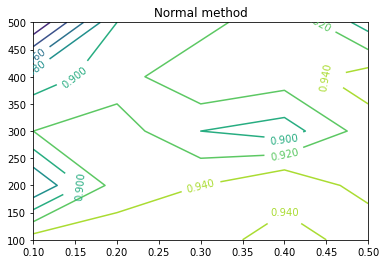

In [29]:
#Generate confidece interval for 100 times
n_mc = 100
level = 0.95
#Set a sequence of values
sample_size = [100, 200, 300, 400, 500]
p = [0.1, 0.2, 0.3, 0.4, 0.5]
result_Normal = []
lwr_N_list = []
upr_N_list = []
for i in range(len(sample_size)):
    for j in range(len(p)):
        true_val = 0
        for m in range(n_mc):
            #Monte Carlo Simulation
            generated_data = np.random.binomial(1, p[j], sample_size[i])
            lwr_N = float(ci_prop(generated_data, level, method = "Normal")[12:16])
            upr_N = float(ci_prop(generated_data, level, method = "Normal")[18:22])
            lwr_N_list.append(lwr_N)
            upr_N_list.append(upr_N)
            if lwr_N < p[j] < upr_N:
                true_val += 1
            else:
                true_val = true_val
        result_Normal.append(true_val)
#Contour Plot
quotients_Normal = [number / n_mc for number in result_Normal]
quotients_Normal_ = np.array(quotients_Normal)
B = np.reshape(quotients_Normal_, (-1, 5))
X, Y = np.meshgrid(p, sample_size)
Z = B
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
ax.clabel(CS, inline=True, fontsize=10)
ax.set_title('Normal method')

##### Agresti-Coull method

Text(0.5, 1.0, 'AC method')

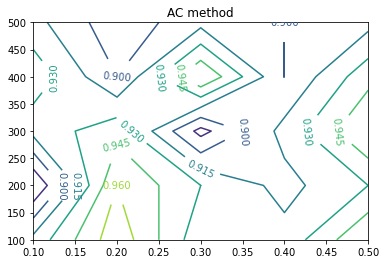

In [30]:
#Generate confidece interval for 100 times
n_mc = 100
level = 0.95
ZVal = 1.96
#Set a sequence of values
sample_size = [100, 200, 300, 400, 500]
p = [0.1, 0.2, 0.3, 0.4, 0.5]
result_AC = []
lwr_AC_list = []
upr_AC_list = []
for i in range(len(sample_size)):
    for j in range(len(p)):
        true_val = 0
        for m in range(n_mc):
            #Monte Carlo Simulation
            generated_data = np.random.binomial(1, p[j], sample_size[i])
            lwr_AC = float(ci_prop(generated_data, level, method = "AC")[12:16])
            upr_AC = float(ci_prop(generated_data, level, method = "AC")[18:22])
            lwr_AC_list.append(lwr_AC)
            upr_AC_list.append(upr_AC)
            if lwr_AC < p[j] < upr_AC:
                true_val += 1
            else:
                true_val = true_val
        result_AC.append(true_val)
#Contour Plot
quotients_AC = [number / n_mc for number in result_AC]
quotients_AC_ = np.array(quotients_AC)
B = np.reshape(quotients_AC_, (-1, 5))
X, Y = np.meshgrid(p, sample_size)
Z = B
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
ax.clabel(CS, inline=True, fontsize=10)
ax.set_title('AC method')

In [31]:
#Marginal Error Computation
m_error = []
z_val = 1.96
for i in range(len(sample_size)):
    for j in range(len(p)):
        re = z_val * math.sqrt((p[j]*(1-p[j]))/sample_size[i])
        m_error.append(re)
#Clopper-Pearson method
lwr_CP_ = [a - b for a, b in zip(quotients_CP, m_error)]
upr_CP_ = [a + b for a, b in zip(quotients_CP, m_error)]
diff_CP_ = [a - b for a, b in zip(upr_CP_, lwr_CP_)]
#Jeffrey method
lwr_Jeffrey = [a - b for a, b in zip(quotients_Jeffrey, m_error)]
upr_Jeffrey = [a + b for a, b in zip(quotients_Jeffrey, m_error)]
diff_Jeffrey = [a - b for a, b in zip(upr_Jeffrey, lwr_Jeffrey)]
#Normal method
lwr_Normal = [a - b for a, b in zip(quotients_Normal, m_error)]
upr_Normal = [a + b for a, b in zip(quotients_Normal, m_error)]
diff_Normal = [a - b for a, b in zip(upr_Normal, lwr_Normal)]
#AC method
lwr_AC_ = [a - b for a, b in zip(quotients_AC, m_error)]
upr_AC_ = [a + b for a, b in zip(quotients_AC, m_error)]
diff_AC_ = [a - b for a, b in zip(upr_AC_, lwr_AC_)]

##### part b

Text(0.5, 1.0, 'average confidence interval for Normal method')

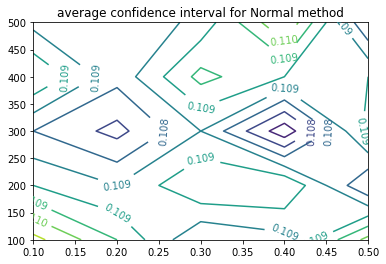

In [32]:
#Compute average confidence interval for Normal method
avg_upr_N = np.mean(np.array_split(upr_N_list, 100), axis=0)
avg_lwr_N = np.mean(np.array_split(lwr_N_list, 100), axis=0)
diff_N = np.subtract(avg_upr_N, avg_lwr_N)
diff_N_splited = np.reshape(diff_N, (-1, 5))
X, Y = np.meshgrid(p, sample_size)
Z = diff_N_splited
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
ax.clabel(CS, inline=True, fontsize=10)
ax.set_title('average confidence interval for Normal method')

Text(0.5, 1.0, 'average confidence interval for Jormal method')

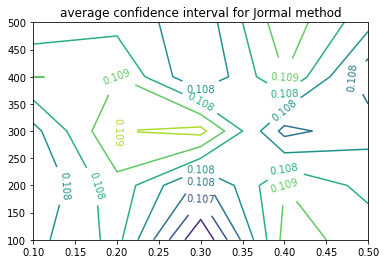

In [33]:
#Compute average confidence interval for Jeffery method
avg_upr_J = np.mean(np.array_split(upr_J_list, 100), axis=0)
avg_lwr_J = np.mean(np.array_split(lwr_J_list, 100), axis=0)
diff_J = np.subtract(avg_upr_J, avg_lwr_J)
diff_J_splited = np.reshape(diff_J, (-1, 5))
X, Y = np.meshgrid(p, sample_size)
Z = diff_J_splited
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
ax.clabel(CS, inline=True, fontsize=10)
ax.set_title('average confidence interval for Jormal method')

Text(0.5, 1.0, 'average confidence interval for CP method')

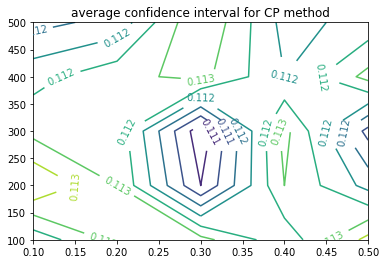

In [34]:
#Compute average confidence interval for CP method
avg_upr_CP = np.mean(np.array_split(upr_CP_list, 100), axis=0)
avg_lwr_CP = np.mean(np.array_split(lwr_CP_list, 100), axis=0)
diff_CP = np.subtract(avg_upr_CP, avg_lwr_CP)
diff_CP_splited = np.reshape(diff_CP, (-1, 5))
X, Y = np.meshgrid(p, sample_size)
Z = diff_CP_splited
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
ax.clabel(CS, inline=True, fontsize=10)
ax.set_title('average confidence interval for CP method')

Text(0.5, 1.0, 'average confidence interval for AC method')

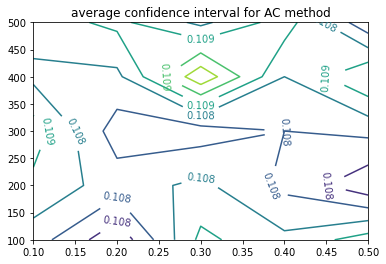

In [35]:
#Compute average confidence interval for AC method
avg_upr_AC = np.mean(np.array_split(upr_AC_list, 100), axis=0)
avg_lwr_AC = np.mean(np.array_split(lwr_AC_list, 100), axis=0)
diff_AC = np.subtract(avg_upr_AC, avg_lwr_AC)
diff_AC_splited = np.reshape(diff_AC, (-1, 5))
X, Y = np.meshgrid(p, sample_size)
Z = diff_AC_splited
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
ax.clabel(CS, inline=True, fontsize=10)
ax.set_title('average confidence interval for AC method')

Text(0.5, 1.0, 'Relative Width Compared by AC and CP')

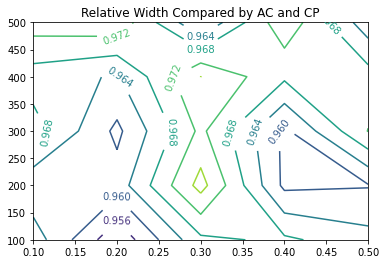

In [36]:
#Relative Width compared with AC and CP
relative_AC_CP = np.divide(diff_AC, diff_CP)
relative_AC_CP_splited = np.reshape(relative_AC_CP, (-1, 5))
X, Y = np.meshgrid(p, sample_size)
Z = relative_AC_CP_splited
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
ax.clabel(CS, inline=True, fontsize=10)
ax.set_title('Relative Width Compared by AC and CP')

Text(0.5, 1.0, 'Relative Width Compared by J and CP')

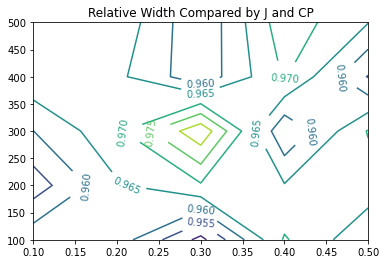

In [37]:
#Relative Width compared with J and CP
relative_J_CP = np.divide(diff_J, diff_CP)
relative_J_CP_splited = np.reshape(relative_J_CP, (-1, 5))
X, Y = np.meshgrid(p, sample_size)
Z = relative_J_CP_splited
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
ax.clabel(CS, inline=True, fontsize=10)
ax.set_title('Relative Width Compared by J and CP')

Text(0.5, 1.0, 'Relative Width Compared by N and CP')

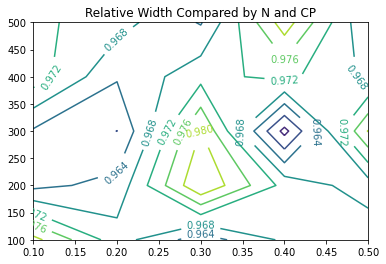

In [38]:
#Relative Width compared with N and CP
relative_N_CP = np.divide(diff_N, diff_CP)
relative_N_CP_splited = np.reshape(relative_N_CP, (-1, 5))
X, Y = np.meshgrid(p, sample_size)
Z = relative_N_CP_splited
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
ax.clabel(CS, inline=True, fontsize=10)
ax.set_title('Relative Width Compared by N and CP')